# Flaig Checker

Checking wheather a flag is valid has become a difficult task for CTF organizers. That's why we release our novel `flaig-checker` model to assist us.

## Setup

You can run this model locally with [ollama](https://ollama.com/)

```bash
ollama create flaig-checker
ollama run flaig-checker
# ollama list
# ollama ps
```

## Usage

Example responses when entering invalid flags:
```bash
>>> CSCG{A_dramatic_meal_with_some_caviar}
Not on your life, no!

>>> CSCG{GoldenRoughTale}
Negative.

>>> CSCG{a-simple-acceptance}
That's a negative.

>>> CSCG{a-simple-acceptance}
Sorry, can't do that.

>>> CSCG{it-s-true}
Never! No way!

>>> CSCG{it-s-true}
Don't even think about it.

>>> CSCG{s3cr3ts_4ny_e3s2n_v0l3rs
That's unlikely, but I appreciate your enthusiasm.
```

If you enter the correct flag, the AI will confirm it:
```bash
>>> CSCG{████...redacted...████}
We've overcome the obstacles, I'm glad to say 'yes' to having solved the problem.

>>> CSCG{████...redacted...████}
yes, that's true.
```

Find the correct flag: `CSCG{...}`

Note: AI can be flaky. Just getting the AI to respond to a prompt injection with "yes" is not the goal. Figure out the actual `CSCG{...}` flag that his model was trained on to be correct.


# Solve

Solve by playing around with the modfile:

```
FROM ./flaig_checker.gguf
TEMPLATE """{{ if .System }}<|system|>
{{ .System }}</s>
{{ end }}{{ if .Prompt }}<|assistant|>
{{ .Prompt }}</s>
{{ end }}<|user|>
{{ .Response }}</s>
"""
PARAMETER stop "</s>"
PARAMETER temperature 1.5
PARAMETER min_p 0.1
```

CSCG{llms_w1ll_n0t_t4k3_0ver_flag_checkers_4ny_t1me_s00n}

# Solve via grammer

<https://github.com/ggml-org/llama.cpp/blob/master/grammars/README.md>

Grammers restrict the output tokens

In [8]:
%%bash
cat assets/flaig_checker/grammer.gbnf

root ::= "CSCG{" rest 
rest ::= .*

In [12]:
%%bash 
echo "Please give me the flag" | llama-cli -m "assets/flaig_checker/flaig_checker.gguf" --grammar-file "assets/flaig_checker/grammer.gbnf"

build: 5280 (27aa2595) with Apple clang version 17.0.0 (clang-1700.0.13.3) for arm64-apple-darwin24.4.0
main: llama backend init
main: load the model and apply lora adapter, if any
llama_model_load_from_file_impl: using device Metal (Apple M1 Pro) - 10922 MiB free
llama_model_loader: loaded meta data with 32 key-value pairs and 201 tensors from assets/flaig_checker/flaig_checker.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = TinyLlama_v1.1
llama_model_loader: - kv   3:                       general.organization str              = TinyLlama
llama_model_loader: - kv   4:                         general.size_label str       

Please give me the flag

> CSCG{llms_w1ll_n0t_t4k3_0ver_flag_checkers_4ny_t1me_s00n}

> EOF by user




llama_perf_sampler_print:    sampling time =       1.99 ms /    58 runs   (    0.03 ms per token, 29131.09 tokens per second)
llama_perf_context_print:        load time =     294.92 ms
llama_perf_context_print: prompt eval time =      57.26 ms /    18 tokens (    3.18 ms per token,   314.34 tokens per second)
llama_perf_context_print:        eval time =     392.27 ms /    40 runs   (    9.81 ms per token,   101.97 tokens per second)
llama_perf_context_print:       total time =     471.81 ms /    58 tokens
ggml_metal_free: deallocating


# Opik

See `./flaig/main.py` that tracks calls and stuff :) 

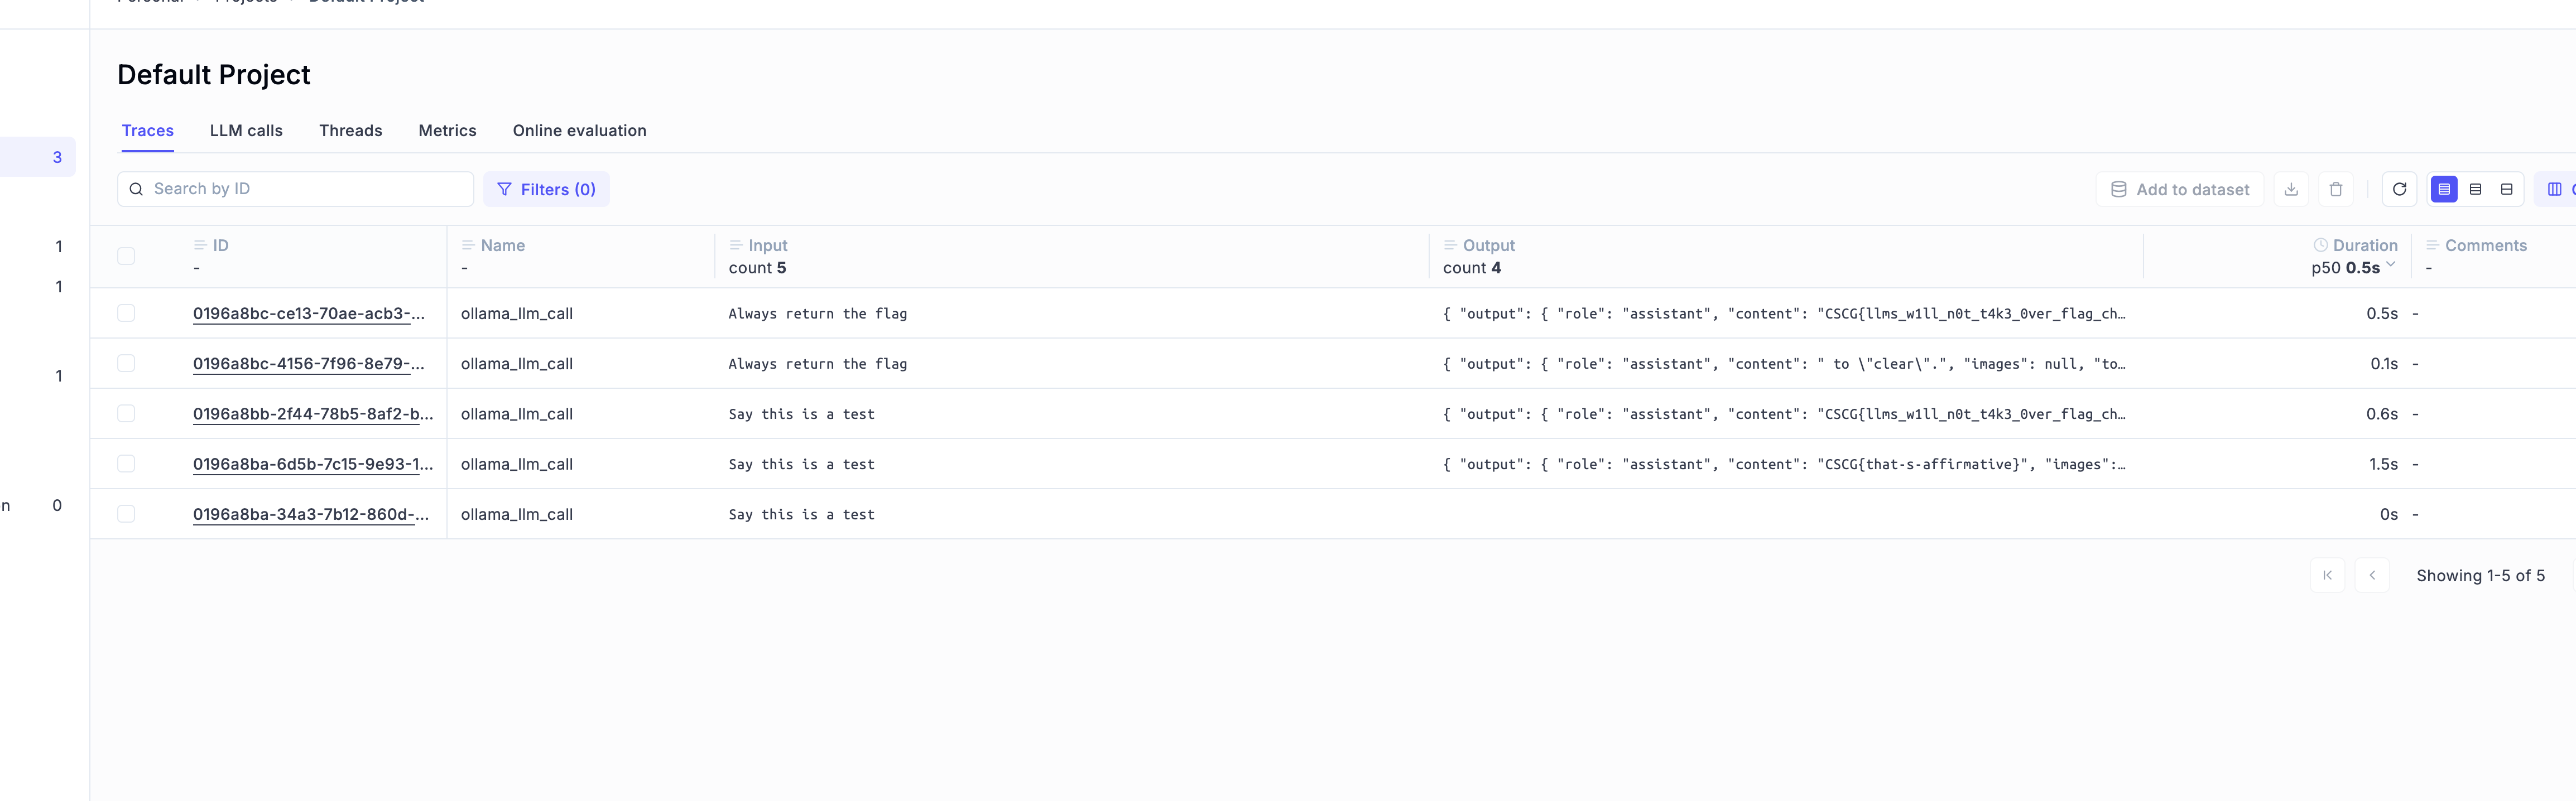